## 단변량분석_범주형변수

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### 1) titanic

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


#### 2) credit

In [3]:
credit = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_NA.csv')
credit.drop(['Payment','Purpose','MostValuable','AppartmentType','NoCredits','Telephone'], axis = 1, inplace = True)
credit.head()

,Creditability,AccountBalance,CreditDuration,CreditAmount,Employment,SexMarital,CurrentAddress,Age,Occupation,ForeignWorker
0,1,3,24,1249,2,4,2,28.0,3,1
1,1,2,9,276,3,4,4,22.0,2,1
2,1,1,18,1049,2,2,4,21.0,3,1
3,1,1,24,6419,5,2,4,NaN,4,1
4,1,3,12,1424,5,2,4,55.0,4,1


## 1. 기초 통계량

#### 1) 리스트를 이용한 기초통계량

In [4]:
gender = ['F','M','F','F','F','M','F','M','M']

f_cnt = gender.count('F')
m_cnt = gender.count('M')
total_cnt = len(gender)

print('F', f_cnt, f_cnt / total_cnt)
print('M', m_cnt, m_cnt / total_cnt)

F 5 0.5555555555555556
M 4 0.4444444444444444


#### 2) 판다스를 이용한 기초통계량

In [5]:
print(titanic['Pclass'].value_counts())
print(titanic['Pclass'].value_counts()/titanic.shape[0])

3    491
1    216
2    184
Name: Pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


## 2. 시각화

### (1) bar chart

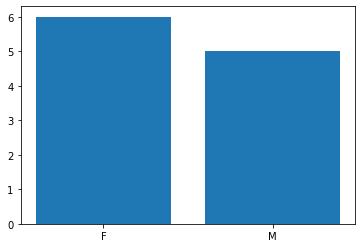

In [6]:
gender = ['F','M']
cnt = [6, 5]

plt.bar(gender, cnt)
plt.show()

- 데이터프레임으로부터 barchart 그리기
    - 범주 이름과 값이 필요. 집계작업이 선행.
    - 판다스의 value_counts()를 사용하여 집계
        - 집계결과의 index: 범주 이름
        - 집계결과의 values: 값

In [7]:
temp = titanic['Pclass'].value_counts()
print(temp)
print(temp.index)
print(temp.values)

3    491
1    216
2    184
Name: Pclass, dtype: int64
Int64Index([3, 1, 2], dtype='int64')
[491 216 184]


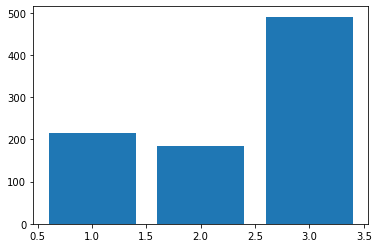

In [8]:
plt.bar(temp.index, temp.values)
plt.show()

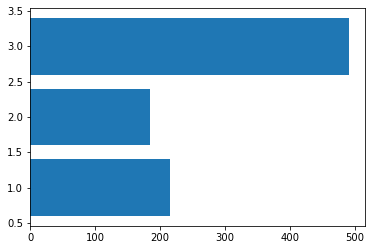

In [9]:
plt.barh(temp.index, temp.values)
plt.show()

- seaborn의 countplot
    - 집계 + bar plot을 한꺼번에

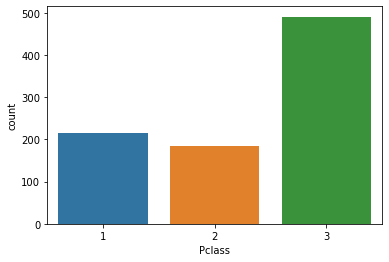

In [10]:
sns.countplot(titanic['Pclass'])
plt.show()

### (2) pie chart

- 먼저 집계를 한 뒤 시각화

In [11]:
# 집계하기
temp = titanic['Pclass'].value_counts()
print(temp)

3    491
1    216
2    184
Name: Pclass, dtype: int64


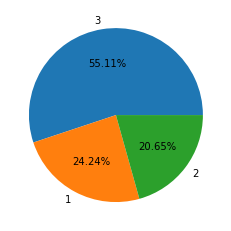

In [12]:
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')
plt.show()

각도와 방향 조정
- startangle = 90 : 90도부터 시작
- counterclock = False : 시계 방향으로

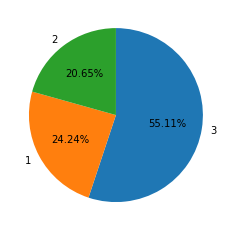

In [13]:
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%',
        startangle = 90, counterclock = False)
plt.show()

간격과 그림자
- explode = [0.05, 0.05, 0.05] : 중심으로부터 1, 2, 3을 얼마나 띄울지
- shadow = True : 그림자 추가

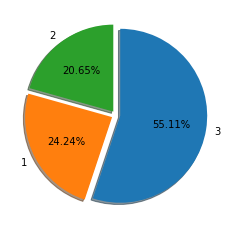

In [14]:
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False, 
        explode = [0.05, 0.05, 0.05], shadow=True)
plt.show()

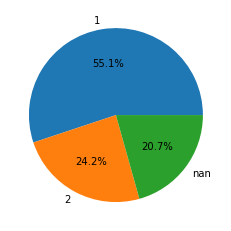

In [15]:
# nan값까지
plt.pie(temp.values, labels = [1, 2, np.nan], autopct = "%.1f%%")
plt.show()